In [27]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
!pwd

/content


In [29]:
# Import data
data = pd.read_csv('data_train_diabetes_health_indicators.csv', )
data['Diabetes_012'] = data['Diabetes_012'].astype(int)
data = data.drop(columns=['Unnamed: 0'])

X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
validation_data = pd.read_csv('date_validation_diabetes_health_indicators.csv')

#number of rows and columns in train data
print(f'Train dataset : \n Number of rows : {data.shape[0]} \n Number of columns : {data.shape[1]}')
print(f'Validation dataset : \n Number of rows : {validation_data.shape[0]} \n Number of columns : {validation_data.shape[1]}')


Train dataset : 
 Number of rows : 47276 
 Number of columns : 22
Validation dataset : 
 Number of rows : 11819 
 Number of columns : 23


In [31]:
columns = data.columns
print(columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [32]:
col = ''
for col in data.columns:
  print(f'Column {col} of type {data[col].dtypes} \n')

Column Diabetes_012 of type int64 

Column HighBP of type int64 

Column HighChol of type float64 

Column CholCheck of type int64 

Column BMI of type float64 

Column Smoker of type float64 

Column Stroke of type float64 

Column HeartDiseaseorAttack of type float64 

Column PhysActivity of type int64 

Column Fruits of type int64 

Column Veggies of type int64 

Column HvyAlcoholConsump of type int64 

Column AnyHealthcare of type int64 

Column NoDocbcCost of type float64 

Column GenHlth of type float64 

Column MentHlth of type float64 

Column PhysHlth of type float64 

Column DiffWalk of type float64 

Column Sex of type int64 

Column Age of type int64 

Column Education of type float64 

Column Income of type float64 



In [33]:
for cols in columns:
  print(f'Column {cols} has these values: {data[cols].unique()} of length {data[cols].nunique()} \n')

Column Diabetes_012 has these values: [2 0 1] of length 3 

Column HighBP has these values: [1 0] of length 2 

Column HighChol has these values: [1. 0.] of length 2 

Column CholCheck has these values: [1 0] of length 2 

Column BMI has these values: [32. 28. 24. 38. 30. 25. 23. 31. 26. 22. 37. 27. 33. 21. 20. 41. 29. 49.
 51. 36. 39. 40. 19. 50. 34. 54. 35. 42. 47. 53. 18. 66. 43. 46. 57. 63.
 44. 55. 45. 56. 61. 62. 60. 15. 48. 52. 17. 78. 59. 68. 13. 16. 84. 69.
 58. 67. 14. 76. 81. 12. 95. 73. 64. 77. 65. 72. 79. 87. 82. 83. 75. 71.
 70. 85.] of length 74 

Column Smoker has these values: [1. 0.] of length 2 

Column Stroke has these values: [0. 1.] of length 2 

Column HeartDiseaseorAttack has these values: [1. 0.] of length 2 

Column PhysActivity has these values: [1 0] of length 2 

Column Fruits has these values: [1 0] of length 2 

Column Veggies has these values: [1 0] of length 2 

Column HvyAlcoholConsump has these values: [0 1] of length 2 

Column AnyHealthcare has thes

In [34]:
print(data['Age'].values[:20])

[ 7 10 12  7  5 10  5  7 10 13 12 12  1 11  4  5  7  8 12 11]


In [35]:
#Analyse descriptive des données de formation
description_train = data.describe()

# Analyse de la distribution de la colonne cible 'Diabetes_012'
distribution_diabetes = data['Diabetes_012'].value_counts(normalize=True) * 100

print(description_train)

print(distribution_diabetes)


       Diabetes_012        HighBP      HighChol     CholCheck           BMI  \
count  47276.000000  47276.000000  47276.000000  47276.000000  47276.000000   
mean       0.305800      0.419325      0.401980      0.964337     28.939081   
std        0.703757      0.493454      0.490303      0.185450      6.562661   
min        0.000000      0.000000      0.000000      0.000000     12.000000   
25%        0.000000      0.000000      0.000000      1.000000     24.000000   
50%        0.000000      0.000000      0.000000      1.000000     28.000000   
75%        0.000000      1.000000      1.000000      1.000000     32.000000   
max        2.000000      1.000000      1.000000      1.000000     95.000000   

             Smoker        Stroke  HeartDiseaseorAttack  PhysActivity  \
count  47276.000000  47276.000000          47276.000000  47276.000000   
mean       0.408114      0.038265              0.085752      0.781284   
std        0.491490      0.191837              0.280000      0.413380

# **Analyse Descriptive des Données Train**

Voici les principales observations de l'ensemble de données de formation :

**Diabetes_012**: La colonne cible montre une moyenne de 0.306, avec un écart-type de 0.704, indiquant une variabilité significative.

**HighBP, HighChol, CholCheck**: Ces colonnes sont des indicateurs binaires (0 ou 1) pour la pression artérielle élevée, le cholestérol élevé et les contrôles de cholestérol.

**BMI**: L'indice de masse corporelle (BMI) a une moyenne de 28.94, avec une plage allant de 12 à 95.

**Smoker, Stroke, HeartDiseaseorAttack**: Ce sont également des indicateurs binaires pour le tabagisme, les accidents vasculaires cérébraux et les crises cardiaques.

**PhysActivity**: Indicateur d'activité physique.

**GenHlth, MentHlth, PhysHlth**: Évaluations générales de la santé, de la santé mentale et de la santé physique. Ils varient en moyenne et en dispersion.

**DiffWalk**: Indicateur de difficulté à marcher.
Sex, Age, Education, Income: Variables démographiques.

---

# **Distribution de la Colonne Cible 'Diabetes_012'**

La distribution des valeurs dans la colonne 'Diabetes_012' est la suivante (en pourcentage) :

**0: 83.57%** (Pas de diabète)

**2: 14.15%** (Probablement diabète avancé ou type 2)

**1: 2.28%** (Probablement diabète précoce ou type 1)



> ### Cette distribution montre un déséquilibre significatif dans les classes, avec une prédominance de la classe '0' (pas de diabète).




In [36]:
#Calculating the correlation matrix
correlation_matrix = data.corr()

# Extracting the correlations with the target variable 'Diabetes_012'
diabetes_correlations = correlation_matrix['Diabetes_012'].sort_values(ascending=False)

print(diabetes_correlations)


Diabetes_012            1.000000
GenHlth                 0.288266
HighBP                  0.274517
BMI                     0.214059
DiffWalk                0.213246
HighChol                0.207668
Age                     0.196352
HeartDiseaseorAttack    0.179085
PhysHlth                0.165133
Stroke                  0.099305
CholCheck               0.068652
Smoker                  0.051670
MentHlth                0.039175
Sex                     0.035216
AnyHealthcare           0.032182
NoDocbcCost             0.023261
Fruits                 -0.031178
Veggies                -0.046419
HvyAlcoholConsump      -0.056353
Education              -0.102056
PhysActivity           -0.155748
Income                 -0.157269
Name: Diabetes_012, dtype: float64


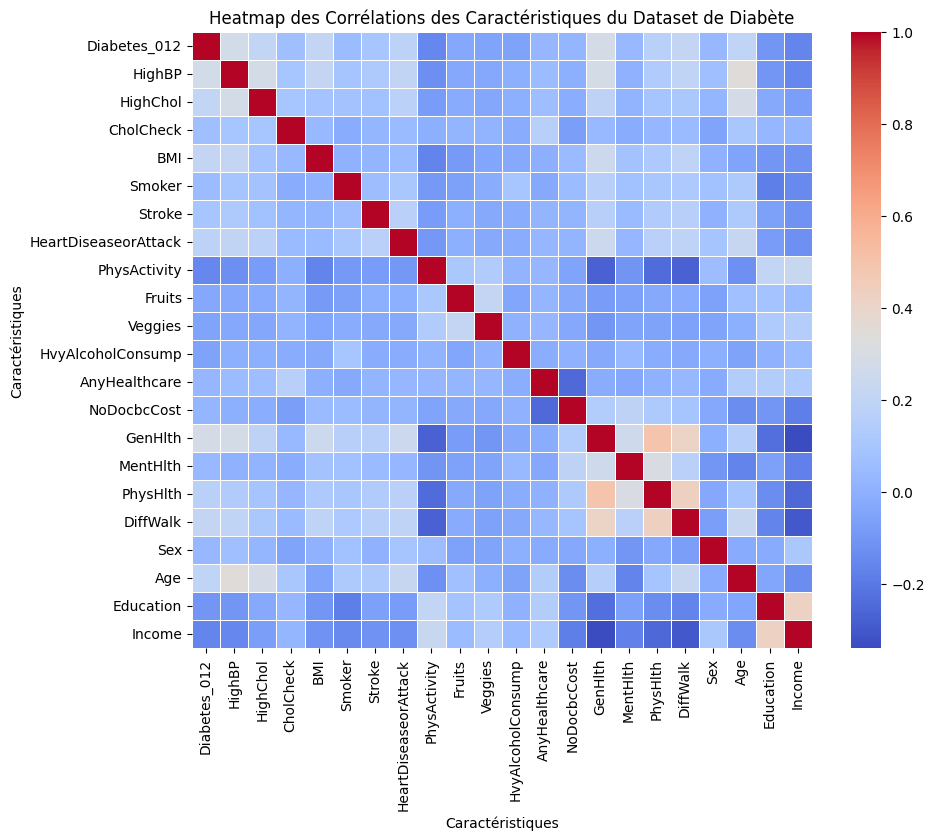

In [37]:

#Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generating a heatmap
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            annot=False,
            linewidths=.5)

# Adding title and labels
plt.title('Heatmap des Corrélations des Caractéristiques du Dataset de Diabète')
plt.xlabel('Caractéristiques')
plt.ylabel('Caractéristiques')

# Showing the plot
plt.show()


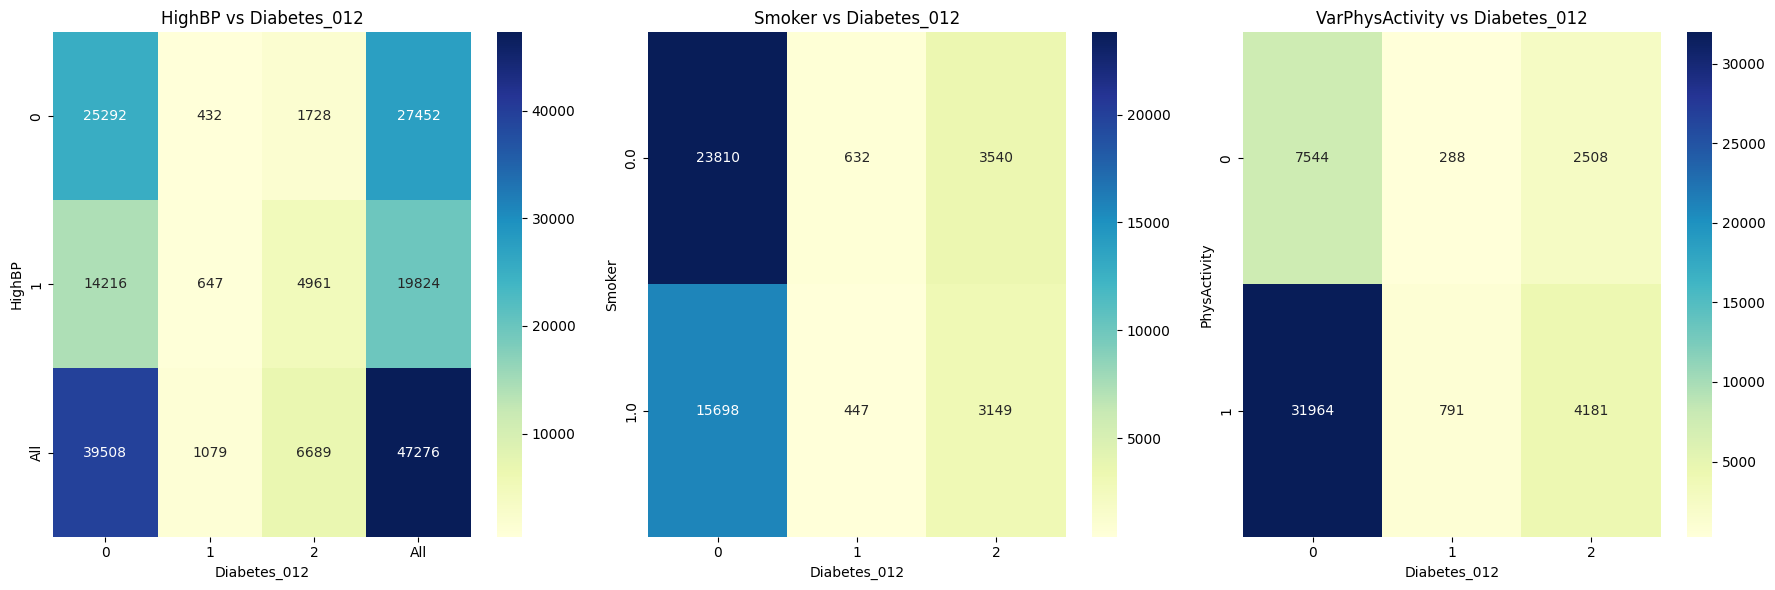

In [38]:




# Supposons que vous avez deux autres variables catégorielles 'Var1' et 'Var2'
# et que vous souhaitez comparer leur relation avec 'Diabetes_012'

# Création d'un tableau de contingence pour chaque paire de variables
contingency_table_highbp_diabetes_display = pd.crosstab(data['HighBP'], data['Diabetes_012'], margins=True)
contingency_table_var1 = pd.crosstab(data['Smoker'], data['Diabetes_012'])
contingency_table_var2 = pd.crosstab(data['PhysActivity'], data['Diabetes_012'])

# Configuration de la grille de subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjust nrows and ncols as needed

# Affichage du premier graphique
sns.heatmap(contingency_table_highbp_diabetes_display, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('HighBP vs Diabetes_012')
axes[0].set_xlabel('Diabetes_012')
axes[0].set_ylabel('HighBP')

# Affichage du deuxième graphique
sns.heatmap(contingency_table_var1, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Smoker vs Diabetes_012')
axes[1].set_xlabel('Diabetes_012')
axes[1].set_ylabel('Smoker')

# Affichage du troisième graphique
sns.heatmap(contingency_table_var2, annot=True, fmt="d", cmap="YlGnBu", ax=axes[2])
axes[2].set_title('VarPhysActivity vs Diabetes_012')
axes[2].set_xlabel('Diabetes_012')
axes[2].set_ylabel('PhysActivity')

# Ajustement de la mise en page
plt.tight_layout()
plt.show()




In [39]:
from scipy.stats import chi2_contingency


# Define other variable pairs for Chi-Squared analysis
# Note: BMI is a continuous variable, so it needs to be categorized for this analysis
# Categorizing BMI into categories for analysis
bmi_categories = pd.cut(data['BMI'], bins=[0, 18.5, 25, 30, 100], labels=["Underweight", "Normal", "Overweight", "Obese"])
data['BMI_Cat'] = bmi_categories

other_vars = ['Smoker', 'BMI_Cat', 'Age', 'PhysActivity']

# Calculate Chi-Squared statistic and p-value for each variable pair
chi2_results = {}
for var in other_vars:
    contingency_table = pd.crosstab(data[var], data['Diabetes_012'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[var] = (chi2, p)


print(chi2_results)



{'Smoker': (127.88396131653448, 1.6996153241853423e-28), 'BMI_Cat': (1906.5269172535614, 0.0), 'Age': (2019.5816422870741, 0.0), 'PhysActivity': (1148.3425419430562, 4.371045725716659e-250)}


Les résultats du test du chi-deux que nous avons obtenus peuvent être interprétés de la manière suivante pour chaque couple de variables :

1. Smoker (Fumeur) et Diabetes_012
Statistique du Chi-Deux : 127.88
P-valeur : 1.70e-28
Interprétation : Il existe une association statistiquement significative entre le tabagisme et la présence ou la gravité du diabète. La p-valeur très faible (proche de zéro) indique que cette association n'est probablement pas due au hasard. Cela suggère que le statut de fumeur pourrait être lié à la condition diabétique, bien que cela ne prouve pas de causalité.

2. BMI_Cat (Catégories d'IMC) et Diabetes_012
Statistique du Chi-Deux : 1906.53
P-valeur : 0.0
Interprétation : Une forte association statistique existe entre les catégories d'IMC et les catégories de diabète. La p-valeur de 0 indique que cette association est hautement significative du point de vue statistique. Cela suggère que l'IMC (sous-pondération, poids normal, surpoids, obésité) est un facteur important dans la présence ou la gravité du diabète.

3. Age et Diabetes_012
Statistique du Chi-Deux : 2019.58
P-valeur : 0.0
Interprétation : Il y a une association très forte et statistiquement significative entre l'âge et le diabète. Cela suggère que l'âge joue un rôle important dans la probabilité d'avoir un diabète, avec des implications potentielles pour le ciblage des efforts de prévention et de traitement.

4. PhysActivity (Activité Physique) et Diabetes_012
Statistique du Chi-Deux : 1148.34
P-valeur : 4.37e-250
Interprétation : Il existe une association significative entre l'activité physique et la présence ou la gravité du diabète. La p-valeur extrêmement faible indique que cette association est très peu susceptible d'être due au hasard. Cela suggère que l'activité physique pourrait être un facteur protecteur contre le diabète ou affecter sa gravité.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Création du modèle Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Entraînement du modèle
gb_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]  # Probabilités pour la courbe ROC

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8405245346869712
Precision: 0.7901338403537058
Recall: 0.8405245346869712
F1 Score: 0.7971085633316105


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Définition des paramètres pour la recherche sur grille
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Création du modèle Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='f1_weighted', verbose=2)

# Entraînement du GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres : ", grid_search.best_params_)

# Utilisation du meilleur modèle
best_model = grid_search.best_estimator_

# Evaluation du meilleur modèle
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
best_f1 = f1_score(y_test, y_pred, average='weighted')

print("Meilleur F1 Score :", best_f1)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Meilleurs paramètres :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Meilleur F1 Score : 0.7997365050228411


In [42]:
with open('gbc.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Modèle sauvegardé avec succès.")

Modèle sauvegardé avec succès.


In [43]:
!pwd

/content
